# Keras Tutorial 
- See https://keras.io


In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.0'

## 1. Dataset

We will use a build-in data 'MNIST' which is a handwritten digit number image from 0 to 9

In [17]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Type of dataset

In [ ]:
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

### Type of value in the dataset

In [ ]:
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

### Shape

In [ ]:
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

### Dimension

In [ ]:
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

### Characteristic of data 

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

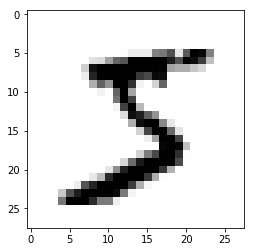

In [5]:
digit = train_images[0]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 2. Create a fully-connect neural network model

In [7]:
from keras import models
from keras import layers

In [8]:
network = models.Sequential()

In [9]:
network

In [10]:
network.add(layers.Dense(256,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [11]:
network.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## 3. Preprocessing Data

In [13]:
train_images.shape

(60000, 28, 28)

In [19]:
train_images = train_images.reshape(60000,28*28) 

In [16]:
train_images[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [20]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [21]:
from keras.utils import to_categorical

In [22]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
test_labels.shape

(10000, 10)

## 4. Train Model

In [30]:
history = network.fit(train_images,train_labels,epochs=30,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 2s 28us/step - loss: 0.1899 - acc: 0.9464 - val_loss: 0.1598 - val_acc: 0.9583
Epoch 2/30
54000/54000 [==============================] - 1s 28us/step - loss: 0.1868 - acc: 0.9477 - val_loss: 0.1579 - val_acc: 0.9600
Epoch 3/30
54000/54000 [==============================] - 2s 28us/step - loss: 0.1838 - acc: 0.9481 - val_loss: 0.1560 - val_acc: 0.9598
Epoch 4/30
54000/54000 [==============================] - 2s 28us/step - loss: 0.1809 - acc: 0.9491 - val_loss: 0.1535 - val_acc: 0.9610
Epoch 5/30
54000/54000 [==============================] - 2s 28us/step - loss: 0.1780 - acc: 0.9501 - val_loss: 0.1515 - val_acc: 0.9617
Epoch 6/30
54000/54000 [==============================] - 2s 28us/step - loss: 0.1752 - acc: 0.9510 - val_loss: 0.1497 - val_acc: 0.9622
Epoch 7/30
54000/54000 [==============================] - 2s 28us/step - loss: 0.1725 - acc: 0.9516 - val_loss: 0.1476 - val_acc:

## 5. Evaluate Model

In [26]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

10000/10000 [==============================] - 0s 33us/step
Test Loss: 0.18829120967686178
Test Accuracy: 0.9467


In [27]:
history.history

{'val_loss': [0.6231971038182577,
  0.4198305516242981,
  0.351975594997406,
  0.31691614802678425,
  0.2944853019714355,
  0.2791762498219808,
  0.26717370319366457,
  0.25655662592252093,
  0.24841146421432495,
  0.24079452403386434,
  0.23454560939470928,
  0.22883457692464193,
  0.22295419772466024,
  0.21769835464159648,
  0.21299583466847738,
  0.20821726552645364,
  0.20397063565254211,
  0.20012032981713612,
  0.19635447069009146,
  0.19277013456821443,
  0.1889963145653407,
  0.18580278813838957,
  0.18210580790042877,
  0.17909057807922363,
  0.17583125778039296,
  0.1730831876595815,
  0.17041811124483744,
  0.16764963618914286,
  0.16508894236882526,
  0.1631417766014735],
 'val_acc': [0.8791666671435038,
  0.9023333330154419,
  0.9116666668256124,
  0.9166666663487752,
  0.9196666668256124,
  0.9233333338101705,
  0.9238333338101705,
  0.9280000004768372,
  0.9295000004768371,
  0.9328333338101705,
  0.9336666671435038,
  0.9351666666666667,
  0.9361666666666667,
  0.93900

In [28]:
# The function argument is a record or history of the model during training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plot_acc_fn(history):

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

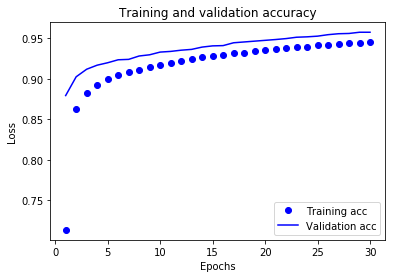

In [29]:
plot_acc_fn(history)